In [2]:
import cv2
import random
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/video_dete'
train_mp4 = f'{path}/train/'
test_mp4 = f'{path}/test/'
train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')

In [5]:
train.head()

,id,path,label
0,TRAIN_000,./train/TRAIN_000.mp4,3
1,TRAIN_001,./train/TRAIN_001.mp4,0
2,TRAIN_002,./train/TRAIN_002.mp4,1
3,TRAIN_003,./train/TRAIN_003.mp4,4
4,TRAIN_004,./train/TRAIN_004.mp4,4


In [6]:
len(train)

610

In [7]:
label = [0,1,2,3,4]
cnt = []
for i in label:
    cnt.append([i,0])

In [8]:
cnt

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]

In [9]:
for i in range(len(train['label'])):
    idx = label.index(train['label'][i])
    cnt[idx][1] += 1

In [10]:
cnt

[[0, 113], [1, 129], [2, 121], [3, 133], [4, 114]]

In [11]:
cnt_x = [x[0] for x in cnt]
cnt_y = [x[1] for x in cnt]

In [14]:
fig = px.bar(train, x=cnt_x, y=cnt_y,
             color = np.unique(cnt_x) ,
             color_continuous_scale="Emrld")
fig.update_xaxes(title="labels")
fig.update_yaxes(title = "nums of Videos")
fig.update_layout(width=800, height=400)
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

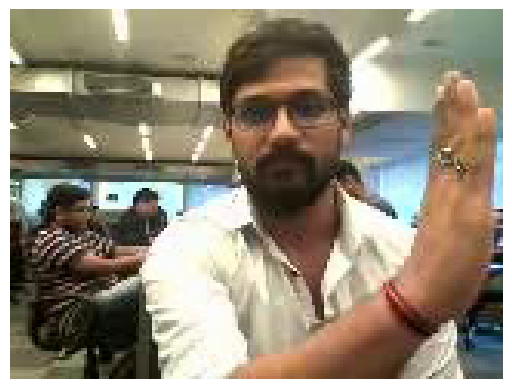

In [15]:
v_path = train['path'][0][2:]
video_path = f'{path}/{v_path}'
cap = cv2.VideoCapture(video_path)
#print(video_path)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()
cap.release()

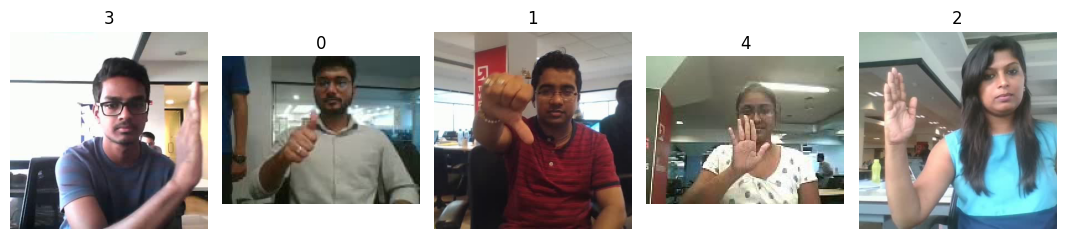

In [17]:
plt.figure(figsize = (15,12))
for idx, i in enumerate(train.label.unique()):
    plt.subplot(4, 7, idx+1)
    df = train[train['label'] == i].reset_index(drop = True)
    video_path = df.loc[random.randint(0, len(df)-1), 'path']
    video_path = f'{path}/{video_path[2:]}'
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #img = Image.open(frame_rgb)
    #img = img.resize((224,224))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

In [18]:
def plot_images(df, label):
    plt.figure(figsize = (12,12))
    species_df = df[df['label'] == label].reset_index(drop = True)
    plt.suptitle(label)
    for idx, i in enumerate(np.random.choice(species_df['path'], 12)):
        plt.subplot(8,8,idx+1)
        v_path = i[2:]
        video_path = f'{path}/{v_path}'
        cap = cv2.VideoCapture(video_path)
        ret, frame = cap.read()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_rgb)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

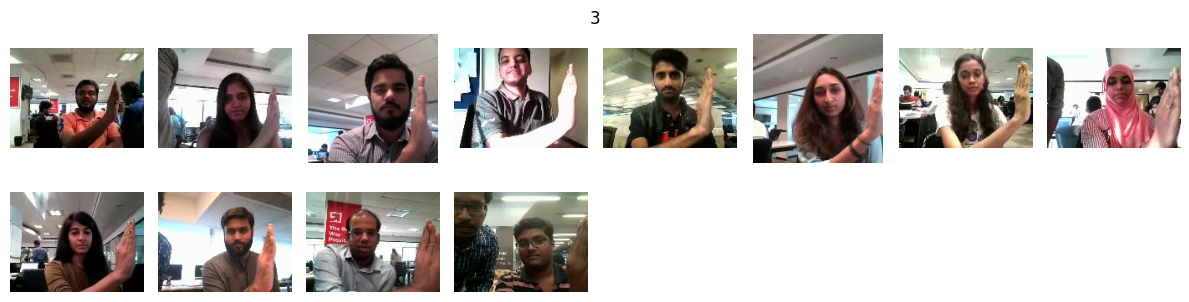

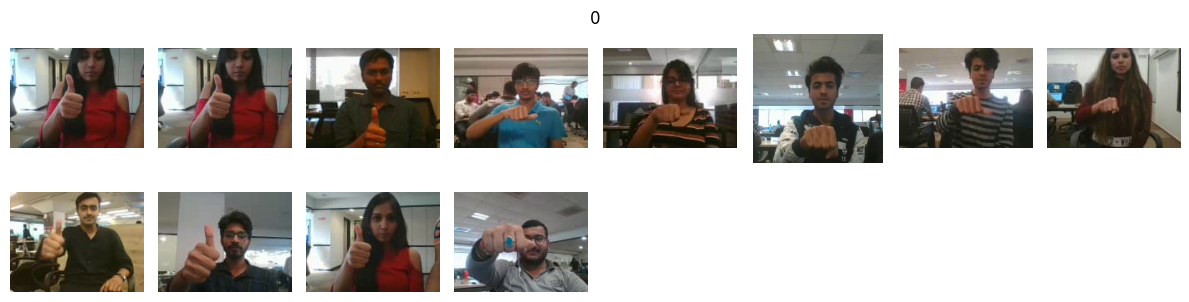

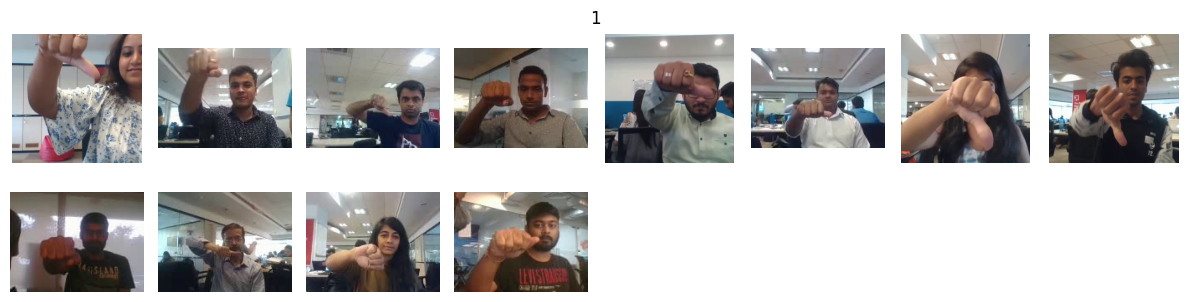

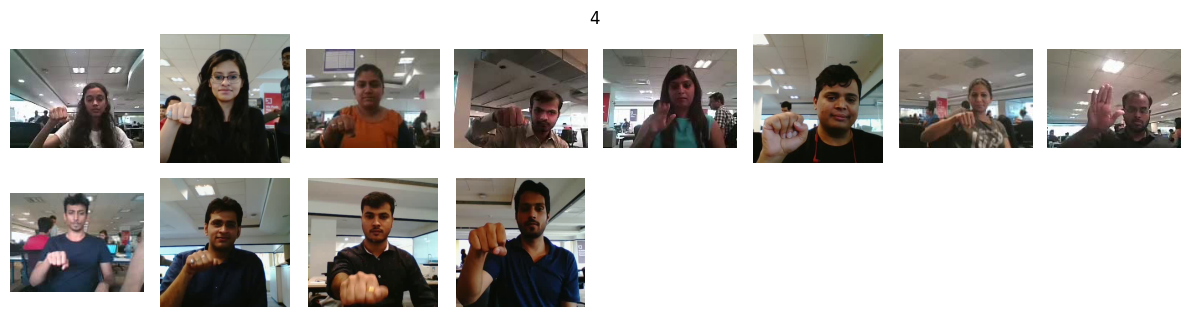

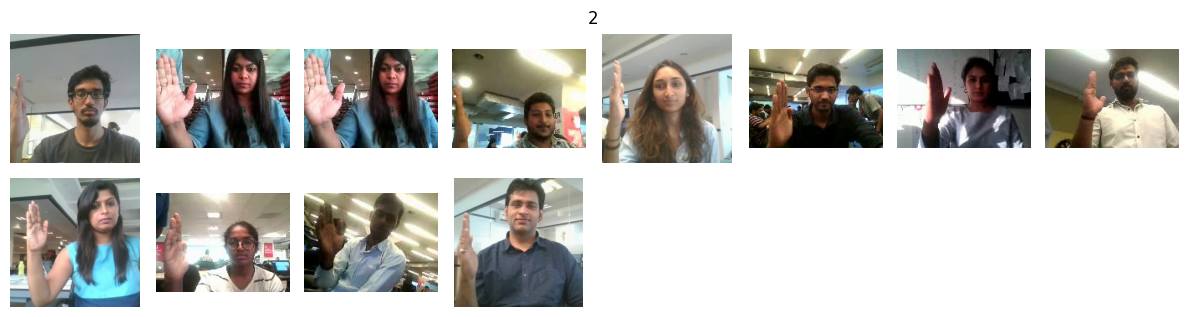

In [19]:
for la in train['label'].unique():
    plot_images(train , label=la)